# About

In this project, I designed and implemented a Jupyter Notebook to train a model for classifying fire images, employing both traditional machine learning and Convolutional Neural Networks (CNNs). The dataset, consisting of images depicting fire and non-fire scenarios, was explored and preprocessed to ensure optimal model training. For traditional machine learning, simply flatten the images and utilized a chosen algorithm (e.g., SVM or Random Forest). The performance of this traditional approach was evaluated on a testing set, with metrics such as accuracy, precision, recall, and F1-score reported. In parallel, a CNN model was designed, incorporating convolutional layers, activation functions, and appropriate optimization techniques. The CNN was trained on the preprocessed image data, and its performance was assessed on the testing set. The results and insights gained from both approaches were compared and discussed, shedding light on the effectiveness of traditional methods versus the power of deep learning in the context of fire image classification.

## Libraries 

In [1]:
import os
import cv2
import matplotlib.pyplot as plt
import random
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix,classification_report

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


## get the path of images

In [2]:

yes_images = os.listdir("./fire_dataset/fire_images/")
no_images = os.listdir("./fire_dataset/non_fire_images/")
print('Fire Images : ',str(len(yes_images)))
print('Non-Fire Images : ',str(len(no_images)))

Fire Images :  755
Non-Fire Images :  243


# Read Images

In [3]:
#yes = 1 and no = 0
Image_size=196
yes_data=[]
no_data=[]
label=[]
featursArray = []
for yes_image in yes_images:
    image_array=cv2.imread("fire_dataset/fire_images/"+yes_image)
    image_array = cv2.cvtColor(image_array,cv2.COLOR_RGB2BGR) #convert
    new_array=cv2.resize(image_array,(Image_size,Image_size))
    new_array = new_array / 255 #scale
    yes_data.append([new_array,1])

for no_image in no_images:
    image_array=cv2.imread("fire_dataset/non_fire_images/"+no_image)
    image_array = cv2.cvtColor(image_array,cv2.COLOR_RGB2BGR) #convert
    new_array=cv2.resize(image_array,(Image_size,Image_size))
    new_array = new_array / 255 #scale
    no_data.append([new_array,0])


# Tota Number of Images

In [4]:
print("Total Images = ", len(yes_data)+len(no_data))
print("Yes Images = ", len(yes_data))
print("No Images = ",len(no_data))

Total Images =  998
Yes Images =  755
No Images =  243


In [5]:
data = yes_data + no_data

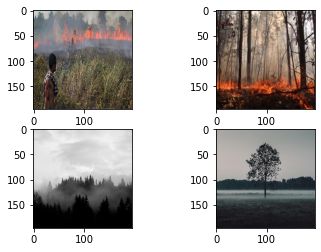

In [6]:
f, axarr = plt.subplots(2,2)
axarr[0,0].imshow(yes_data[0][0])
axarr[0,1].imshow(yes_data[1][0])
axarr[1,0].imshow(no_data[0][0])
axarr[1,1].imshow(no_data[1][0])

In [7]:
X = []
labels = []
for image, label in data:
    X.append(image)
    labels.append(label)

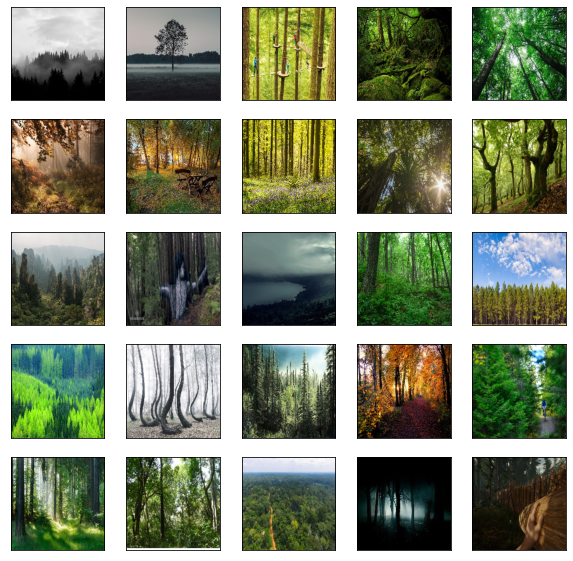

In [8]:
plt.figure(figsize=(10,10))
count = 755
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X[count])
    count = count + 1
plt.show()

# Flatten for Machine learning Algorithms

In [9]:
lenofimage = len(X)
X_flatten = np.array(X).reshape(lenofimage,-1)
X_flatten[1]

array([0.42745098, 0.41960784, 0.42745098, ..., 0.11764706, 0.05490196,
       0.04705882])

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X_flatten,labels)

In [11]:
from sklearn.svm import SVC
svc = SVC(kernel='linear',gamma='auto')
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

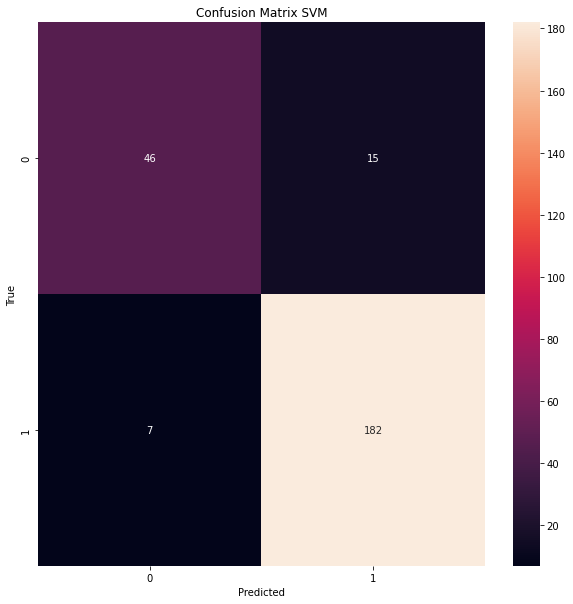

              precision    recall  f1-score   support

           0       0.87      0.75      0.81        61
           1       0.92      0.96      0.94       189

    accuracy                           0.91       250
   macro avg       0.90      0.86      0.88       250
weighted avg       0.91      0.91      0.91       250



In [12]:
plt.figure(figsize = (10,10))

sns.heatmap(confusion_matrix(y_test,y_pred),annot = True,fmt='g')
plt.title("Confusion Matrix SVM")
plt.xlabel("Predicted")
plt.ylabel("True")

plt.show()
print(classification_report(y_test,y_pred))

In [13]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(n_estimators = 50, random_state = 0)
RF.fit(X_train, y_train)
y_pred = RF.predict(X_test)

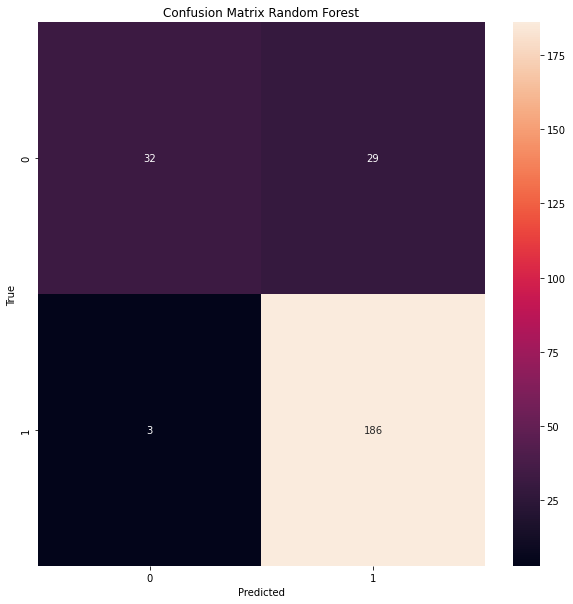

              precision    recall  f1-score   support

           0       0.91      0.52      0.67        61
           1       0.87      0.98      0.92       189

    accuracy                           0.87       250
   macro avg       0.89      0.75      0.79       250
weighted avg       0.88      0.87      0.86       250



In [14]:
plt.figure(figsize = (10,10))

sns.heatmap(confusion_matrix(y_test,y_pred),annot = True,fmt='g')
plt.title("Confusion Matrix Random Forest")
plt.xlabel("Predicted")
plt.ylabel("True")

plt.show()
print(classification_report(y_test,y_pred))

In [15]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

c:\Users\mf21-20\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


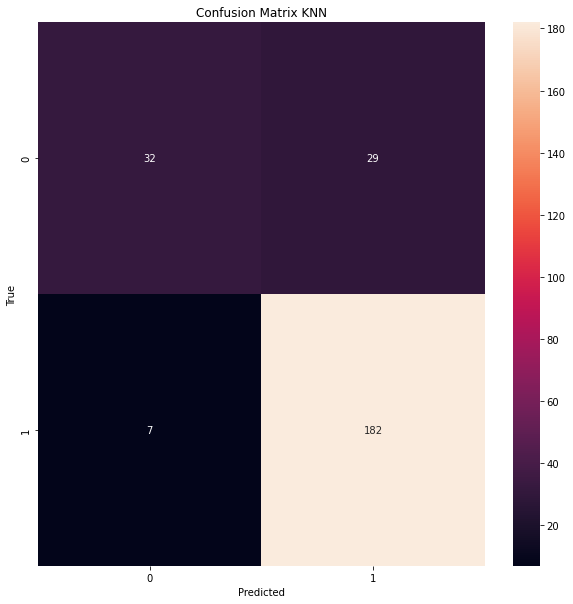

              precision    recall  f1-score   support

           0       0.82      0.52      0.64        61
           1       0.86      0.96      0.91       189

    accuracy                           0.86       250
   macro avg       0.84      0.74      0.77       250
weighted avg       0.85      0.86      0.84       250



In [16]:
plt.figure(figsize = (10,10))

sns.heatmap(confusion_matrix(y_test,y_pred),annot = True,fmt='g')
plt.title("Confusion Matrix KNN")
plt.xlabel("Predicted")
plt.ylabel("True")

plt.show()
print(classification_report(y_test,y_pred))

In [17]:
X_train,X_test,y_train,y_test = train_test_split(np.array(X),np.array(labels),test_size = 0.3,stratify = np.array(labels))

In [18]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((698, 196, 196, 3), (300, 196, 196, 3), (698,), (300,))

In [19]:
model = Sequential()

model.add(Conv2D(128,(2,2),input_shape = (196,196,3),activation='relu'))
model.add(Conv2D(64,(2,2),activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(32,(2,2),activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(128))
model.add(Dense(1,activation= "sigmoid"))

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 195, 195, 128)     1664      
                                                                 
 conv2d_1 (Conv2D)           (None, 194, 194, 64)      32832     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 97, 97, 64)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 96, 96, 32)        8224      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 48, 48, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 73728)             0

In [21]:
callbacks = [EarlyStopping(monitor = 'val_loss',patience = 10,restore_best_weights=True)]
model.compile(optimizer='adam',loss = 'binary_crossentropy',metrics=['accuracy'])
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs = 30,batch_size = 32,callbacks = callbacks)

Epoch 1/30
22/22 [==============================] - 35s 2s/step - loss: 0.7585 - accuracy: 0.7794 - val_loss: 0.2569 - val_accuracy: 0.8700
Epoch 2/30
22/22 [==============================] - 34s 2s/step - loss: 0.1727 - accuracy: 0.9298 - val_loss: 0.1112 - val_accuracy: 0.9700
Epoch 3/30
22/22 [==============================] - 34s 2s/step - loss: 0.0972 - accuracy: 0.9585 - val_loss: 0.0969 - val_accuracy: 0.9567
Epoch 4/30
22/22 [==============================] - 34s 2s/step - loss: 0.0891 - accuracy: 0.9628 - val_loss: 0.1305 - val_accuracy: 0.9600
Epoch 5/30
22/22 [==============================] - 34s 2s/step - loss: 0.0639 - accuracy: 0.9771 - val_loss: 0.1042 - val_accuracy: 0.9567
Epoch 6/30
22/22 [==============================] - 34s 2s/step - loss: 0.0418 - accuracy: 0.9871 - val_loss: 0.0953 - val_accuracy: 0.9733
Epoch 7/30
22/22 [==============================] - 34s 2s/step - loss: 0.0179 - accuracy: 0.9957 - val_loss: 0.0945 - val_accuracy: 0.9700
Epoch 8/30
22/22 [==

In [22]:
y_pred = model.predict(X_test)

10/10 [==============================] - 2s 230ms/step


In [23]:
y_pred = y_pred.reshape(-1)
y_pred[y_pred<0.5] = 0
y_pred[y_pred>=0.5] = 1
y_pred = y_pred.astype('int')

In [24]:
y_pred

array([1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1])

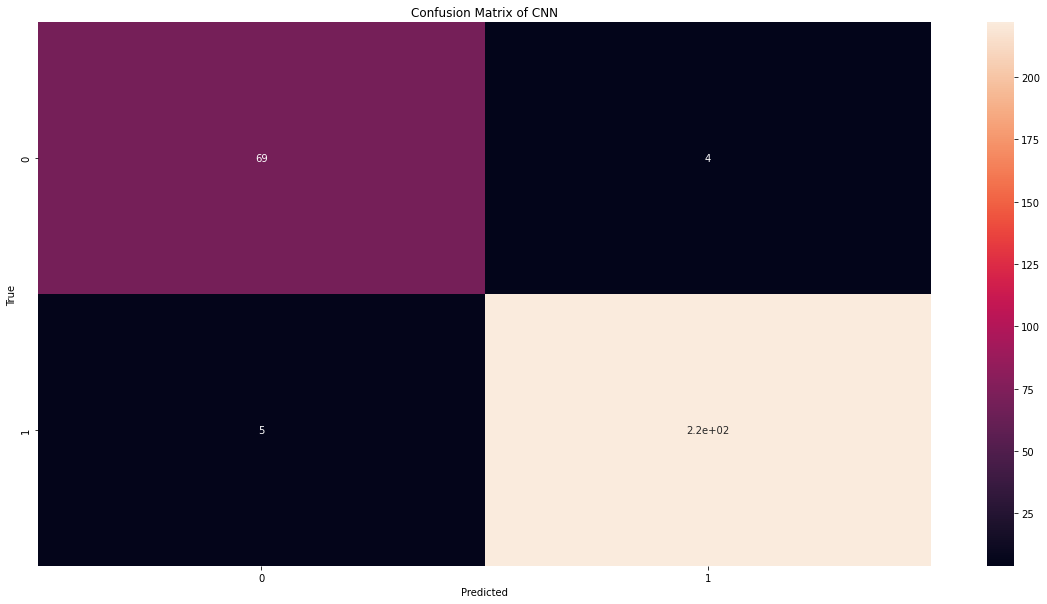

In [25]:
plt.figure(figsize = (20,10))

sns.heatmap(confusion_matrix(y_test,y_pred),annot = True)
plt.title("Confusion Matrix of CNN")
plt.xlabel("Predicted")
plt.ylabel("True")

plt.show()

In [26]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94        73
           1       0.98      0.98      0.98       227

    accuracy                           0.97       300
   macro avg       0.96      0.96      0.96       300
weighted avg       0.97      0.97      0.97       300

